In [155]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

First, assume that there is no selection. This will set the bound for noise expected between technical replicates

In [156]:
rep1_t0 = np.random.poisson(coverage, genes)
rep1_t1 = np.random.poisson(coverage, genes)
rep2_t0 = np.random.poisson(coverage, genes)
rep2_t1 = np.random.poisson(coverage, genes)

Assume that there is a normally distributed DFE with mean 0. Choose variance 

In [238]:
coverage = 2000
genes = 4300

(0.9610584187496312, 0.0)

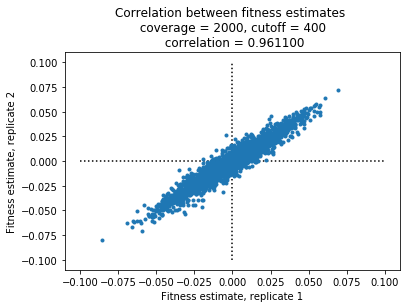

In [246]:
insertions_gene = np.random.exponential(coverage, genes)
rep1_t0 = np.random.poisson(insertions_gene, genes)
rep2_t0 = np.random.poisson(insertions_gene, genes)
#now for combining fitness effect and random sampling:
rep1_t1 = np.zeros(genes)
rep2_t1 = np.zeros(genes)
s = np.random.normal(0, 0.02, genes)
rep1_t1 = np.random.poisson(rep1_t0*(1+s)**6.64)
rep2_t1 = np.random.poisson(rep2_t0*(1+s)**6.64)


#for i in range(0, genes):
    #s = np.random.normal(0, 0.03)
    #rep1_t1[i] = np.random.poisson(rep1_t0[i]*(1+s)**6.64)
    #rep2_t1[i] = np.random.poisson(rep2_t0[i]*(1+s)**6.64)

cutoff = 400
mask = (rep1_t1>cutoff)&(rep1_t0>cutoff)&(rep2_t1>cutoff)&(rep2_t0>cutoff)
rep1_t1 = rep1_t1[mask]
rep2_t1 = rep2_t1[mask]
rep2_t0 = rep2_t0[mask]
rep1_t0 = rep1_t0[mask]


s_1 = np.log(rep1_t1/rep1_t0/np.sum(rep1_t1)*np.sum(rep1_t0))/6.64
s_2 = np.log(rep2_t1/rep2_t0/np.sum(rep2_t1)*np.sum(rep2_t0))/6.64
plt.plot(s_1, s_2, '.')
plt.xlabel('Fitness estimate, replicate 1')
plt.ylabel('Fitness estimate, replicate 2')
plt.title('Correlation between fitness estimates \n coverage = %i, cutoff = %i \n correlation = %f' % (coverage, cutoff, np.round(pearsonr(s_1, s_2)[0],decimals=4)))
plt.hlines(0, -0.1, 0.1, linestyles='dotted')
plt.vlines(0, -0.1, 0.1, linestyles='dotted')
plt.savefig("/Users/anuraglimdi/Desktop/TnSeq_LTEE/figures_for_DAC/fitness_coverage2000_cutoff_400",dpi=600)

#plt.plot(s_1, s_1)
pearsonr(s_1, s_2)

(0.9806399974655575, 0.0)

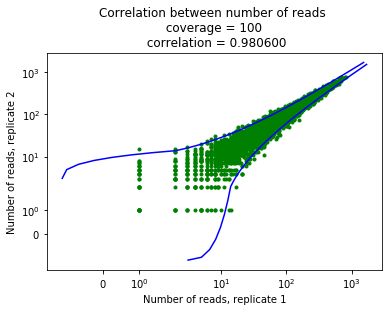

In [236]:
plt.plot(rep1_t1, rep2_t1,'g.')
plt.xscale('symlog')
plt.yscale('symlog')
x = np.linspace(1, 1600, 1600)
m = np.sum(rep2_t1)/np.sum(rep1_t1)
#defining the threshold set by Poisson noise
x1 = x + 3*np.sqrt(x/(m+1))
x2 = x - 3*np.sqrt(x/(m+1))
y1 = m*(x - 3*np.sqrt(x/(m+1)))
y2 = m*(x + 3*np.sqrt(x/(m+1)))
plt.xlabel('Number of reads, replicate 1')
plt.ylabel('Number of reads, replicate 2')
plt.plot(x1, y1,'b', x2, y2,'b')
plt.title('Correlation between number of reads \n coverage = %i \n correlation = %f' % (coverage, np.round(pearsonr(rep1_t1, rep2_t1)[0],decimals=4)))
plt.savefig("/Users/anuraglimdi/Desktop/TnSeq_LTEE/figures_for_DAC/counts_coverage100_no_cutoff",dpi=600)
pearsonr(rep1_t1, rep2_t1)

(array([3.12038570e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.12038570e-02, 0.00000000e+00,
        0.00000000e+00, 3.12038570e-02, 0.00000000e+00, 9.36115711e-02,
        1.24815428e-01, 2.18426999e-01, 1.24815428e-01, 2.80834713e-01,
        4.36853999e-01, 1.34176585e+00, 3.43242427e+00, 1.40417357e+01,
        5.66037967e+01, 4.21876147e+01, 9.61078797e+00, 2.68353171e+00,
        1.12333885e+00, 4.36853999e-01, 2.80834713e-01, 2.18426999e-01,
        1.24815428e-01, 1.87223142e-01, 6.24077141e-02, 6.24077141e-02,
        3.12038570e-02, 0.00000000e+00, 3.12038570e-02, 3.12038570e-02,
        6.24077141e-02, 6.24077141e-02, 0.00000000e+00, 0.00000000e+00,
        3.12038570e-02, 3.12038570e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.12038570e-02]),
 array([-0.15573602, -0.14827795, -0.14081988, -0.13336181, -0.12590374,
        -0.11844568, 

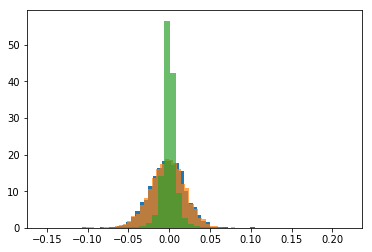

In [178]:
plt.hist(s_1, bins=50, density=1)
plt.hist(s_2, bins=50, alpha=0.7, density=1)
plt.hist(s_1-s_2, bins=50, alpha=0.7,density=1)